# hypothesis_testing exercise

exercise 1 -------------------------
Ace Realty wants to determine whether the average time it takes to sell homes
is different for its two offices. A sample of 40 sales from office #1 revealed
a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales 
from office #2 revealed a mean of 100 days and a standard deviation of 20 days.
Use a .05 level of significance.

2 offices |  is average time it takes to sell homes different for its two offices?
    H0 - 
    1) sample of 40 sales, mean of 90 days - std 15 days
    2) sample of 50 sales, mean of 100 days - std 20 days
  

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from math import sqrt

In [49]:
# example fm curriculum
xbar1 = 90 # x1.mean()
xbar2 = 100 # x2.mean()

n1 = 40 # x1.shape[0]
n2 = 50 # x2.shape[0]

s1 = 15 # x1.std()
s2 = 20 # x2.std()

degf = n1 + n2 - 2







In [50]:
s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

17.956702977389302

In [51]:
standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [52]:
# p test
p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

t = -2.62523
p = 1.98979


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from pydataset import data
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

mpg = data('mpg')



Exercise 2 ----------------------------
Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [2]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
type(mpg)

pandas.core.frame.DataFrame

In [16]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [9]:
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [65]:
# only need manufacturer, model, year, and hwy
columns = ['manufacturer', 'model', 'year', 'cty', 'hwy']
mpg[columns].head()


,manufacturer,model,year,cty,hwy
1,audi,a4,1999,18,29
2,audi,a4,1999,21,29
3,audi,a4,2008,20,31
4,audi,a4,2008,21,30
5,audi,a4,1999,16,26


In [67]:
mpg_new = mpg[columns]
mpg_new.head()

,manufacturer,model,year,cty,hwy
1,audi,a4,1999,18,29
2,audi,a4,1999,21,29
3,audi,a4,2008,20,31
4,audi,a4,2008,21,30
5,audi,a4,1999,16,26


In [29]:
mpg_2008 = mpg[columns].year == 2008
# mpg[mpg_2008]

In [61]:
mpg_2008['combined_mpg'] = mpg_2008.cty + mpg_2008.hwy

AttributeError: 'Series' object has no attribute 'cty'

In [30]:
fuel_efficienchy_2008_hwy = mpg[mpg_2008].hwy.mean()
# fuel_efficienchy_2008_hwy

23.45299145299145

In [ ]:
fuel_efficienchy_2008_cty = mpg[mpg_2008].cty.mean()
# fuel_efficienchy_2008_cty

In [28]:
mpg_1999 = mpg[columns].year == 1999
# mpg[mpg_1999]

In [39]:
# fuel_efficienchy_1999 = mpg[mpg_1999].hwy.mean()
# fuel_efficienchy_1999

In [40]:
fuel_efficienchy_1999_hwy = mpg[mpg_1999].hwy.mean()
#fuel_efficienchy_1999

dtype('bool')

In [43]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
   # 2 sample difference

# this is results of quick look between means - using unique models
print("2008 fuel efficiency is - ", fuel_efficienchy_2008)
print("1999 fuel efficiency is - ", fuel_efficienchy_1999)

2008 fuel efficiency is -  24.782608695652176
1999 fuel efficiency is -  26.263157894736842


NOTE to self for connecting to DB
    import pandas as pd
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/employees' df = pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url) print(df)

In [ ]:
xbar1 = mpg[mpg_1999].hwy.unique().mean()
xbar2 = mpg[mpg_2008].hwy.unique().mean()

n1 = x1.shape[0]
n2 = x2.shape[0]

s1 = x1.std()
s2 = x2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

# BEGIN - In Class Examples

In [68]:
mpg.trans = mpg.trans.str[:4]
mgp

NameError: name 'mgp' is not defined

In [ ]:
# below was Zach showing example in class
  # ex compact vs population

In [ ]:
pop_cty_mpg = mpg.cty.mean()

In [ ]:
auto_cty_mpg = mpg[mpg.trans == 'auto'].cty

In [ ]:
stats.ttest_1samp(auto_cty_mpg, pop_cty_mpg)

In [ ]:
t_stat, p = stats.ttest_1samp(auto_cty_mpg, pop_cty_mpg)

t_stat

In [ ]:
# another example
# Do volkswagen get better hwy mpg than avg?

# null: no diff
# alt: there is diff vs population

In [ ]:
volks_hwy_mpg = mpg[mpg.manufacturer == 'volkswagen'].hwy

In [ ]:
stats.ttest_1samp(volks_hwy_mpg, mpg.hwy.mean())

In [ ]:
# 2 sample example
# do compact or midsize cars get better city gass mileage?

In [ ]:
comp_mpg = mpg[mpg['class'] == 'compact'].cty
midsize_mpg = mpg[mpg['class'] == 'midsize'].cty

In [ ]:
type(comp_mpg), type(midsize_mpg)

In [ ]:
stats.ttest_ind(comp_mileage, midsize_mpg)

In [ ]:
mpg.groupby('class').hwy.mean()

- ttest_1samp(seq of values: list, pop_avg: float)
- ttest_ind(seq of values 1: list, sequence of values 2: list)

# END - In Class Examples

In [ ]:
# Are compact cars more fuel-efficient than the average car?
     # compact vs whole

In [ ]:
# Do manual cars get better gas mileage than automatic cars?
     # 2 samples difference

# Correlation Exercise Questions

In [76]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt

from scipy import stats
from pydataset import data



# 1 Use the telco_churn data. 
- Does tenure correlate with... 
            - monthly charges? 
            - Total charges? 
- What happens if you control for phone and internet service?

In [116]:
# ex of csv pull
   # remeber to save and rename telco as "TELCO_correlation_exercise"
telco = pd.read_csv('TELCO_correlation_exercise.csv')
telco.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone svc Descipt,internet_service,internet svc Descript,contract_type,...,has_internet,has_phone_and_has_internet,partner_dependents,d2 trimmed,e2 trimmed,Partner n Dependent,Tenure for Start Date,Start Date,new mo chrges,new chrges check
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,True,True,5,Yes,Yes,3,9.0,1/5/19,65.6,GTG
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,True,True,other,No,No,0,9.1,1/4/19,59.9,GTG
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,True,True,other,No,No,0,3.8,6/13/19,73.9,GTG


In [77]:
telco.dtypes

customer_id                    object
gender                         object
is_senior_citizen             float64
partner                        object
dependents                     object
phone_service                 float64
phone svc Descipt              object
internet_service              float64
internet svc Descript          object
contract_type                 float64
contract Descript              object
payment_type                   object
monthly_charges               float64
total_charges                 float64
churn                          object
is_female                      object
has_churned                    object
has_phone                      object
has_internet                   object
has_phone_and_has_internet     object
partner_dependents             object
d2 trimmed                     object
e2 trimmed                     object
Partner n Dependent           float64
Tenure for Start Date         float64
Start Date                     object
new mo chrge

In [80]:
type(telco)

pandas.core.frame.DataFrame

In [121]:
 # troubleshooting - checked rows , contain bad values
# telco.monthly_charges.value_counts

In [122]:
 # troubleshooting - checked rows , contain bad values
# telco.total_charges.value_counts

In [140]:
 # troubleshooting - checked rows and originall not all matched
# len(x)

In [141]:
 # troubleshooting - checked rows and originall not all matched
# len(y1)

In [142]:
 # troubleshooting - checked rows and originall not all matched
# len(y2)

In [144]:

x = telco['Tenure for Start Date']

y1 = telco.monthly_charges
y2 = telco.total_charges

In [145]:
## pearsonR for y1
r, p = stats.pearsonr(x, y1)

print(f'r = {r}')
print(f'p = {p}')

r = 0.24752182436772552
p = 8.277097497778666e-99


In [146]:
# pearsonR for y2
r, p = stats.pearsonr(x, y2)

print(f'r = {r}')
print(f'p = {p}')

r = 0.8264362509431538
p = 0.0


In [ ]:
    # PRESET VALUES #
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [98]:
# 'Tenure for Start Date'
# monthly_charges
# total_charges

x = telco['Tenure for Start Date']

y1 = telco.monthly_charges
y2 = telco.total_charges

## Does tenure correlate with... monthly charges? 
#corr, p = stats.pearsonr(x, y1)
#corr, p

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy1 = (((x - x.mean()) * (y1 - y1.mean())).sum() / n) / (stdev(x) * stdev(y1))
r_xy1

In [ ]:
def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy2 = (((x - x.mean()) * (y2 - y2.mean())).sum() / n) / (stdev(x) * stdev(y2))
r_xy2

Calculate the corresponding p-value

In [ ]:
t = (r_xy1 * sqrt(n - 2)) / sqrt(1 - r_xy1**2)
t

In [ ]:
t2 = (r_xy2 * sqrt(n - 2)) / sqrt(1 - r_xy2**2)
t2

In [ ]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

In [ ]:
p2 = stats.t2.sf(t2, df=degf) * 2 # *2 for a two-tailed test
p2

In [ ]:
p < α

In [ ]:
p2 < α

In [ ]:
## Does tenure correlate with... Total charges?? 
corr, p = stats.pearsonr(x, y2)
corr, p


# 2 Use the employees database.
- Is there a relationship between how long an employee
    has been with the company and their salary?
- Is there a relationship between how long an employee 
    has been with the company and the number of titles they have had?
    
# hint, use datedif

In [ ]:
# ex of sql pull
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = 'SELECT * FROM salaries WHERE to_date > NOW()'
salaries = pd.read_sql(query, url)
salaries

# 3 Use the sleepstudy data. 
- Is there a relationship between days and reaction time?

In [107]:
sleep_study = data('sleepstudy')

In [108]:
sleep_study.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

In [109]:
# pre-set values
n = sleep_study.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the 
                    # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [110]:
# Calculate Pearson Correlation Coefficient
x = sleep_study.Days
y = sleep_study.Reaction

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.5352302262650251

In [ ]:
# Calculate the corresponding p-value

In [111]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

8.453663146744406

In [112]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

9.894096322214921e-15

In [113]:
p < α  # alpha is in the pre-set values

True

In [115]:
# altternate check using stats pearson r
   # stats.pearsonr returns R and P
stats.pearsonr(x, y)

(0.5352302262650253, 9.894096322214812e-15)

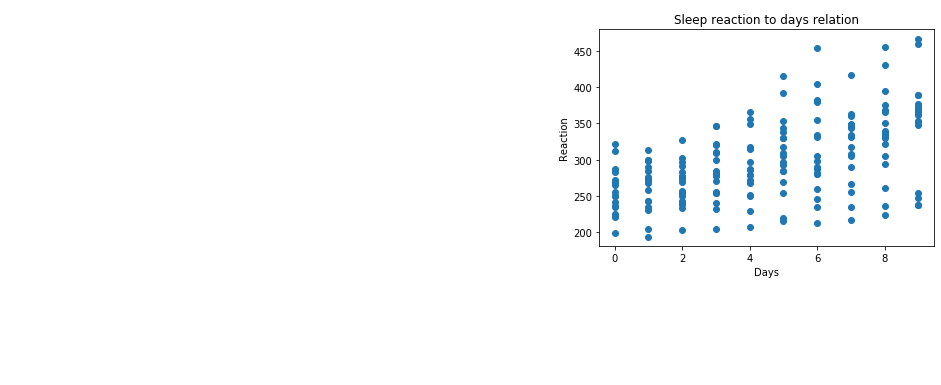

In [114]:
# x = sleep_study.Days
# y = sleep_study.Reaction
plt.scatter(x, y)
plt.title('Sleep reaction to days relation')
plt.xlabel('Days')
plt.ylabel('Reaction')
plt.annotate('Origin', xy=(0, 0), xytext=( -18, 500),
             arrowprops={'facecolor': 'blue'})
plt.show()

In [ ]:
# make a "line" graph with central line and upper/lower limits

In [ ]:
# Kevin's SQL Code solution
employees_url = get_db_url(user, password, host, database='employees')
employees = pd.read_sql('''SELECT
    e.*,
    datediff('2002-09-30', e.hire_date) tenure,
    t.title,
    t.from_date title_from,
    datediff('2002-09-30', t.from_date) t_tenure,
    et.titles,
    s.salary,
    s.from_date salary_from,
    datediff('2002-09-30', s.from_date) s_tenure,
    es.salaries
FROM
    employees e
JOIN 
    titles t 
    USING(emp_no)
JOIN 
    salaries s 
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) titles
    FROM
        titles
    GROUP BY
        emp_no) et
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) salaries
    FROM
        salaries
    GROUP BY
        emp_no) es
    USING(emp_no)
WHERE
    s.to_date > '2002-09-30'
    AND t.to_date > '2002-09-30';
''', employees_url)
print(employees.shape)
print(employees.dtypes)
employees.sample(5)

# chi square exercises

1 Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

	            Codeup Student	Not Codeup Student
    Uses a Macbook	        49	                20
    Doesn't Use A Macbook	 1	                30

2 Choose another 2 categorical variables from the mpg dataset and perform a 
chi2  contingency table test with them. 
Be sure to state your null and alternative hypotheses.

3 Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?